In [2]:
# Setup environment detection and configuration

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Detect if running in Kaggle
def is_kaggle():
    return os.path.exists('/kaggle/input')

# Get the correct path to project root
def get_project_root():
    if is_kaggle():
        return '/kaggle'
    else:
        # If a notebook is in notebooks/ folder, go up one level for project root
        current_dir = os.getcwd()
        if os.path.basename(current_dir) == 'notebooks':
            return os.path.dirname(current_dir)  # Go up one level
        return current_dir  # Already at root level

# Set up environment-specific paths
project_root = get_project_root()

if is_kaggle():
    # Kaggle paths
    input_dir = '/kaggle/input'
    working_dir = '/kaggle/working'
    vis_dir = '/kaggle/working/visualizations'
else:
    # Local paths relative to project root
    input_dir = os.path.join(project_root, 'data', 'input')
    working_dir = os.path.join(project_root, 'data', 'working')
    vis_dir = os.path.join(project_root, 'data', 'visualizations')

# Create directories if they don't exist
for dir_path in [input_dir, working_dir, vis_dir]:
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print(f"Created directory: {dir_path}")

# Display environment info
print(f"Running in {'Kaggle' if is_kaggle() else 'Local Jupyter'} environment")
print(f"Project root: {project_root}")
print(f"Input directory: {input_dir}")
print(f"Working directory: {working_dir}")
print(f"Visualization directory: {vis_dir}")

# Set visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Setup complete. Ready to begin COVID-19 data analysis.")

Running in Local Jupyter environment
Project root: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker
Input directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\input
Working directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working
Visualization directory: C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\visualizations
Setup complete. Ready to begin COVID-19 data analysis.


In [3]:
# Data Collection
# Download data from Our World in Data COVID-19 dataset

# Define file paths based on environment
owid_csv_name = 'owid-covid-data.csv'
output_file = os.path.join(working_dir, owid_csv_name)

# Possible Kaggle dataset paths (check common Kaggle COVID dataset names)
kaggle_possible_paths = [
    os.path.join(input_dir, 'covid19', owid_csv_name),
    os.path.join(input_dir, 'covid-19-data', owid_csv_name),
    os.path.join(input_dir, 'owid-covid-data', owid_csv_name),
    os.path.join(input_dir, 'owid-covid19-data', owid_csv_name),
    os.path.join(input_dir, 'covid19dataset', owid_csv_name),
    # Add more potential paths if needed
]

try:
    # First check if dataset exists in any Kaggle input path
    found_in_kaggle = False
    if is_kaggle():
        for path in kaggle_possible_paths:
            if os.path.exists(path):
                print(f"Found COVID-19 data at: {path}")
                df = pd.read_csv(path)
                found_in_kaggle = True
                break

    # If not found in Kaggle or not in Kaggle, try direct download
    if not found_in_kaggle:
        print("Downloading COVID-19 data from Our World in Data GitHub...")
        url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
        df = pd.read_csv(url)

        # Save a local copy
        df.to_csv(output_file, index=False)
        print(f"Data downloaded and saved to {output_file}")

    print(f"Data loaded successfully. Shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")

except Exception as e:
    print(f"Error loading data: {e}")
    print("\nTo add this dataset to your Kaggle notebook:")
    print("1. Click 'Add data' at the top right of the notebook")
    print("2. Search for 'covid-19 dataset' or 'our world in data covid'")
    print("3. Add the dataset and run this cell again")
    print("\nOr you can manually download from:")
    print("https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv")

Data downloaded and saved to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working\owid-covid-data.csv
Data loaded successfully. Shape: (429435, 67)
Date range: 2020-01-01 to 2024-08-14


In [4]:
# Data Exploration
# Examine the structure and content of the dataset

# Check the first few rows
print("Preview of the dataset:")
display(df.head())

# Check basic information
print("\nDataset Information:")
df.info()

# Check summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Examine columns
print("\nColumns in the dataset:")
for col in df.columns:
    print(f"- {col}")

# Check for missing values
print("\nMissing values by column:")
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
display(missing_data[missing_data['Missing Values'] > 0])

Preview of the dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,54.42,18.60,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         4093

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,411804.00,410159.00,408929.00,411804.00,410608.00,409378.00,411804.00,410159.00,408929.00,411804.00,410608.00,409378.00,184817.00,39116.00,39116.00,40656.00,40656.00,10993.00,10993.00,24497.00,24497.00,79387.00,75403.00,79387.00,75403.00,103965.00,103965.00,95927.00,94348.00,85417.00,81132.00,78061.00,53600.00,70971.00,195029.00,85417.00,81132.00,78061.00,53600.00,195029.00,192177.00,192177.00,196190.00,360492.00,334663.00,323270.00,331315.00,328292.00,211996.00,328865.00,345911.00,247165.00,243817.00,161741.00,290689.00,390299.00,319127.00,429435.00,13411.00,13411.00,13411.00,13411.00
mean,7365292.35,8017.36,8041.03,81259.57,71.85,72.06,112096.20,122.36,122.71,835.51,0.76,0.76,0.91,660.97,15.66,3911.74,125.99,317.89,9.67,4291.72,82.62,21104573.94,67285.41,924.25,3.27,142178.36,2.83,0.10,2403.63,561697983.43,248706410.74,228663910.07,150581058.90,739864.03,283875.82,124.28,53.50,48.68,36.30,1851.48,106070.70,0.07,42.88,394.07,30.46,8.68,5.49,18904.18,13.92,264.64,8.56,10.77,33.10,50.65,3.11,73.70,0.72,152033640.40,56047.65,9.77,10.93,1772.67
std,44775816.77,229664.87,86616.11,441190.14,1368.32,513.64,162240.41,1508.78,559.70,1134.93,6.98,2.55,0.40,2139.62,22.79,9845.75,151.16,514.41,13.57,10919.62,88.40,84098694.31,247734.00,2195.43,9.03,1138214.66,7.31,0.12,33443.66,1842160151.90,800646051.13,740376339.04,436069655.27,3183064.38,1922351.90,85.10,29.38,29.04,30.22,3117.83,786688.39,0.18,24.87,1785.45,9.09,6.09,4.14,19829.58,20.07,120.76,4.93,10.76,13.85,31.91,2.55,7.39,0.15,697540771.67,156869.08,12.04,24.56,1991.89
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,15.10,1.14,0.53,661.24,0.10,79.37,0.99,0.10,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2936.45
25%,6280.75,0.00,0.00,43.00,0.00,0.00,1916.10,0.00,0.00,24.57,0.00,0.00,0.72,21.00,2.33,186.00,31.00,17.00,1.55,223.00,23.73,364654.00,2244.00,43.59,0.29,1486.00,0.20,0.02,7.10,1970788.00,1050009.25,964400.00,602282.00,2010.00,279.00,44.77,27.88,21.22,5.92,106.00,43.00,0.00,22.22,37.73,22.20,3.53,2.06,4227.63,0.60,175.70,5.35,1.90,22.60,20.86,1.30,69.50,0.60,523798.00,176.50,2.06,-1.50,116.88
50%,63653.00,0.00,12.00,799.00,0.00,0.00,29145.48,0.00,2.79,295.09,0.00,0.00,0.95,90.00,6.43,776.00,74.23,92.00,4.64,864.00,56.28,2067330.00,8783.00,234.14,0.97,6570.00,0.85,0.06,17.50,14394348.00,6901087.50,6191345.00,5765440.00,20531.00,3871.00,130.55,64.30,57.92,35.91,605.00,771.00,0.01,42.85,88.12,29.70,6.29,3.87,12294.88,2.50,245.46,7.20,6.30,33.10,49.54,2.5


Columns in the dataset:
- iso_code
- continent
- location
- date
- total_cases
- new_cases
- new_cases_smoothed
- total_deaths
- new_deaths
- new_deaths_smoothed
- total_cases_per_million
- new_cases_per_million
- new_cases_smoothed_per_million
- total_deaths_per_million
- new_deaths_per_million
- new_deaths_smoothed_per_million
- reproduction_rate
- icu_patients
- icu_patients_per_million
- hosp_patients
- hosp_patients_per_million
- weekly_icu_admissions
- weekly_icu_admissions_per_million
- weekly_hosp_admissions
- weekly_hosp_admissions_per_million
- total_tests
- new_tests
- total_tests_per_thousand
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- positive_rate
- tests_per_case
- tests_units
- total_vaccinations
- people_vaccinated
- people_fully_vaccinated
- total_boosters
- new_vaccinations
- new_vaccinations_smoothed
- total_vaccinations_per_hundred
- people_vaccinated_per_hundred
- people_fully_vaccinated_per_hundred
- total_boosters_per_hundr

,Missing Values,Percentage
weekly_icu_admissions,418442,97.44
weekly_icu_admissions_per_million,418442,97.44
excess_mortality,416024,96.88
excess_mortality_cumulative_absolute,416024,96.88
excess_mortality_cumulative,416024,96.88
excess_mortality_cumulative_per_million,416024,96.88
weekly_hosp_admissions,404938,94.30
weekly_hosp_admissions_per_million,404938,94.30
icu_patients_per_million,390319,90.89
icu_patients,390319,90.89


In [10]:
# Explore country-level information

# Count unique countries and continents
print(f"Number of unique locations: {df['location'].nunique()}")
print(f"Number of unique countries: {df[df['iso_code'].str.startswith('OWID_') == False]['location'].nunique()}")
print(f"Number of continents/regions: {df[df['iso_code'].str.startswith('OWID_')]['location'].nunique()}")

# List all continents
continents = df[df['continent'].notnull()]['continent'].unique()
print(f"\nContinents: {', '.join(continents)}")

# Get the latest date in the dataset
latest_date = df['date'].max()
print(f"\nLatest data date: {latest_date}")

# Countries with the highest case counts (the latest date)
print("\nTop 10 countries by total cases (latest available data):")
top_cases = df[df['date'] == latest_date].sort_values('total_cases', ascending=False)
top_countries = top_cases[~top_cases['iso_code'].str.startswith('OWID_', na=True)]  # Filter out aggregates
display(top_countries[['location', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million']].head(10))

Number of unique locations: 255
Number of unique countries: 237
Number of continents/regions: 18

Continents: Asia, Europe, Africa, Oceania, North America, South America

Latest data date: 2024-08-14

Top 10 countries by total cases (latest available data):


,location,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
217093,Lithuania,NaN,NaN,NaN,NaN
230301,Malaysia,NaN,NaN,NaN,NaN


In [15]:
# Data Cleaning and Preparation

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
print("Converted date column to datetime format")

# Create a list of focus countries for detailed analysis
focus_countries = ['Kenya', 'United States', 'India', 'United Kingdom', 'Brazil',
                   'South Africa', 'China', 'Germany', 'Australia', 'Russia']

# Create a filtered dataset for focus countries
df_focus = df[df['location'].isin(focus_countries)].copy()
print(f"Created filtered dataset with {len(focus_countries)} focus countries")

# Check the date range for each focus country
date_ranges = df_focus.groupby('location').agg({'date': ['min', 'max']})
print("\nDate ranges for focus countries:")
display(date_ranges)

# Handle missing values for key metrics
key_metrics = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
               'total_cases_per_million', 'total_deaths_per_million',
               'people_vaccinated', 'people_fully_vaccinated']

# Forward fill missing values within each country (carries forward the last known value)
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country].copy()
    for metric in key_metrics:
        if metric in country_data.columns:
            # Forward fill within reasonable limits
            df_focus.loc[df_focus['location'] == country, metric] = country_data[metric].ffill()

print("\nHandled missing values for key metrics using forward fill method")

# Calculate derived metrics
df_focus['case_fatality_rate'] = (df_focus['total_deaths'] / df_focus['total_cases'] * 100).round(2)
print("Created case fatality rate metric")

# Create vaccination percentage where data is available
if 'people_vaccinated' in df_focus.columns and 'population' in df_focus.columns:
    df_focus['vaccination_percentage'] = (df_focus['people_vaccinated'] / df_focus['population'] * 100).round(2)
    df_focus['fully_vaccinated_percentage'] = (df_focus['people_fully_vaccinated'] / df_focus['population'] * 100).round(2)
    print("Created vaccination percentage metrics")

# Summary of cleaned data
print("\nSummary of cleaned data for focus countries:")
print(f"Shape: {df_focus.shape}")
print(f"Date range: {df_focus['date'].min()} to {df_focus['date'].max()}")
print(f"Missing values remaining in key metrics:")
display(df_focus[key_metrics].isnull().sum())

# Save the cleaned data
cleaned_file = os.path.join(working_dir, 'cleaned_covid_data.csv')
df_focus.to_csv(cleaned_file, index=False)
print(f"Saved cleaned data to {cleaned_file}")

Converted date column to datetime format
Created filtered dataset with 10 focus countries

Date ranges for focus countries:


date           
                      min        max
location                            
Australia      2020-01-05 2024-08-04
Brazil         2020-01-05 2024-08-04
China          2020-01-05 2024-08-04
Germany        2020-01-05 2024-08-04
India          2020-01-05 2024-08-12
Kenya          2020-01-05 2024-08-04
Russia         2020-01-05 2024-08-04
South Africa   2020-01-05 2024-08-04
United Kingdom 2020-01-05 2024-08-04
United States  2020-01-05 2024-08-04


Handled missing values for key metrics using forward fill method
Created case fatality rate metric
Created vaccination percentage metrics

Summary of cleaned data for focus countries:
Shape: (16748, 70)
Date range: 2020-01-05 00:00:00 to 2024-08-12 00:00:00
Missing values remaining in key metrics:


total_cases                    0
new_cases                      0
total_deaths                   0
new_deaths                     0
total_cases_per_million        0
total_deaths_per_million       0
people_vaccinated           3937
people_fully_vaccinated     4236
dtype: int64

Saved cleaned data to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\working\cleaned_covid_data.csv


<Figure size 1400x1000 with 0 Axes>

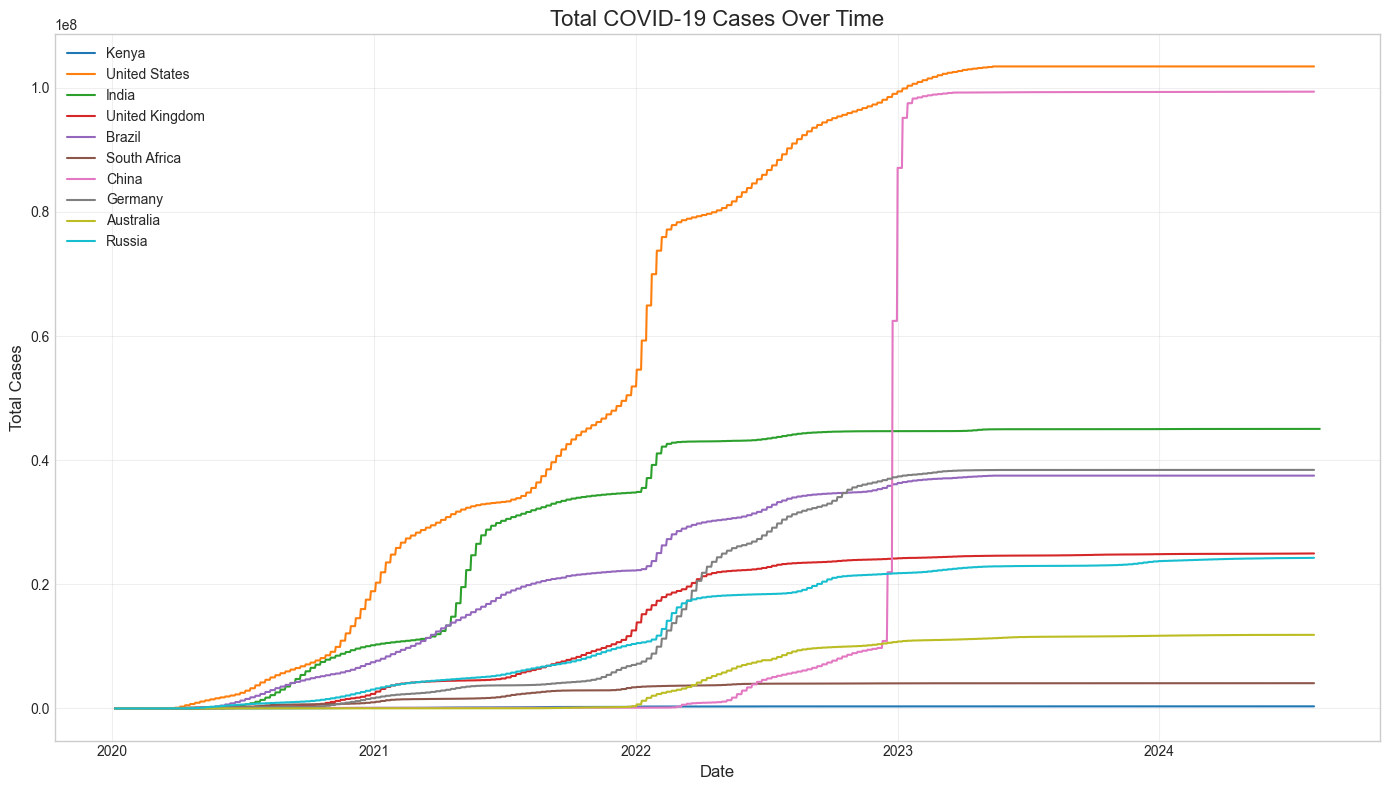

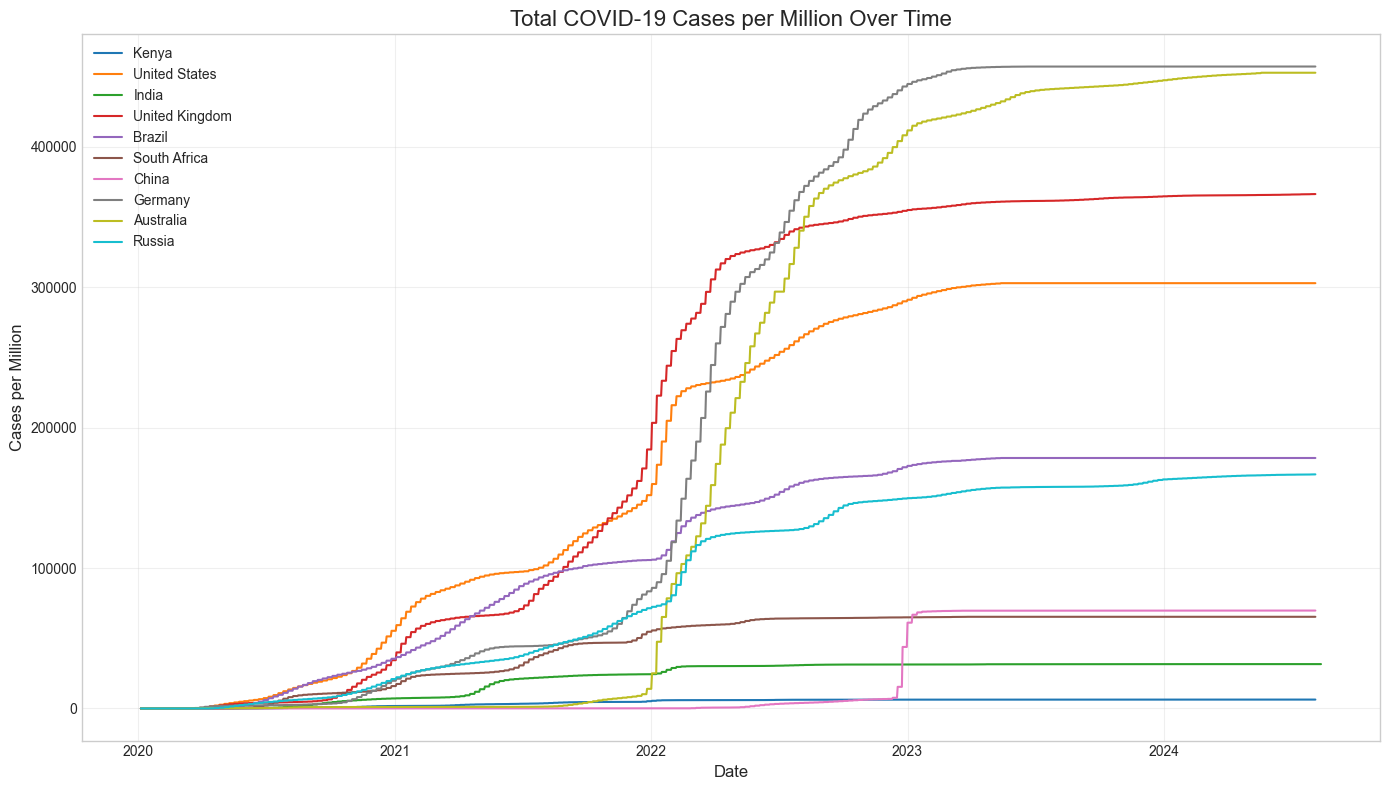

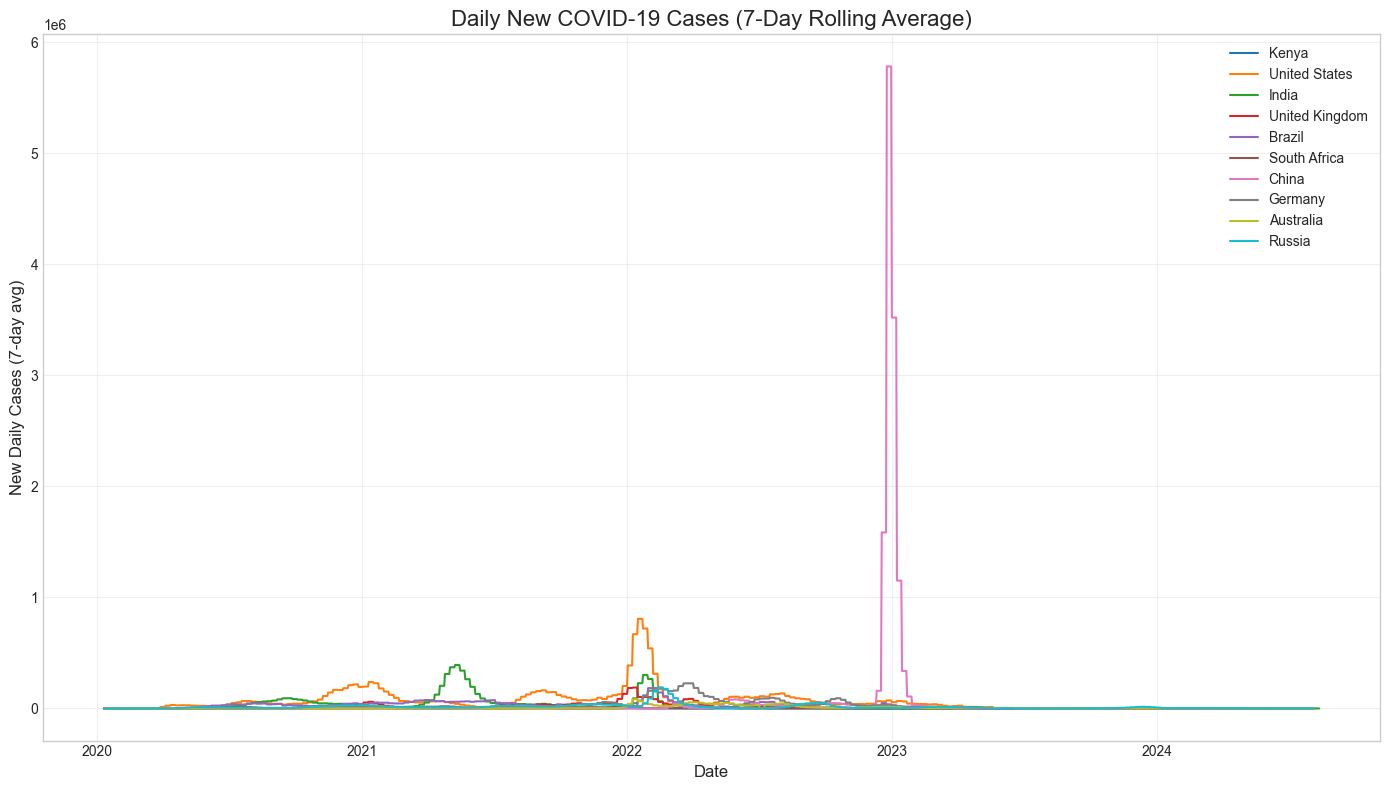

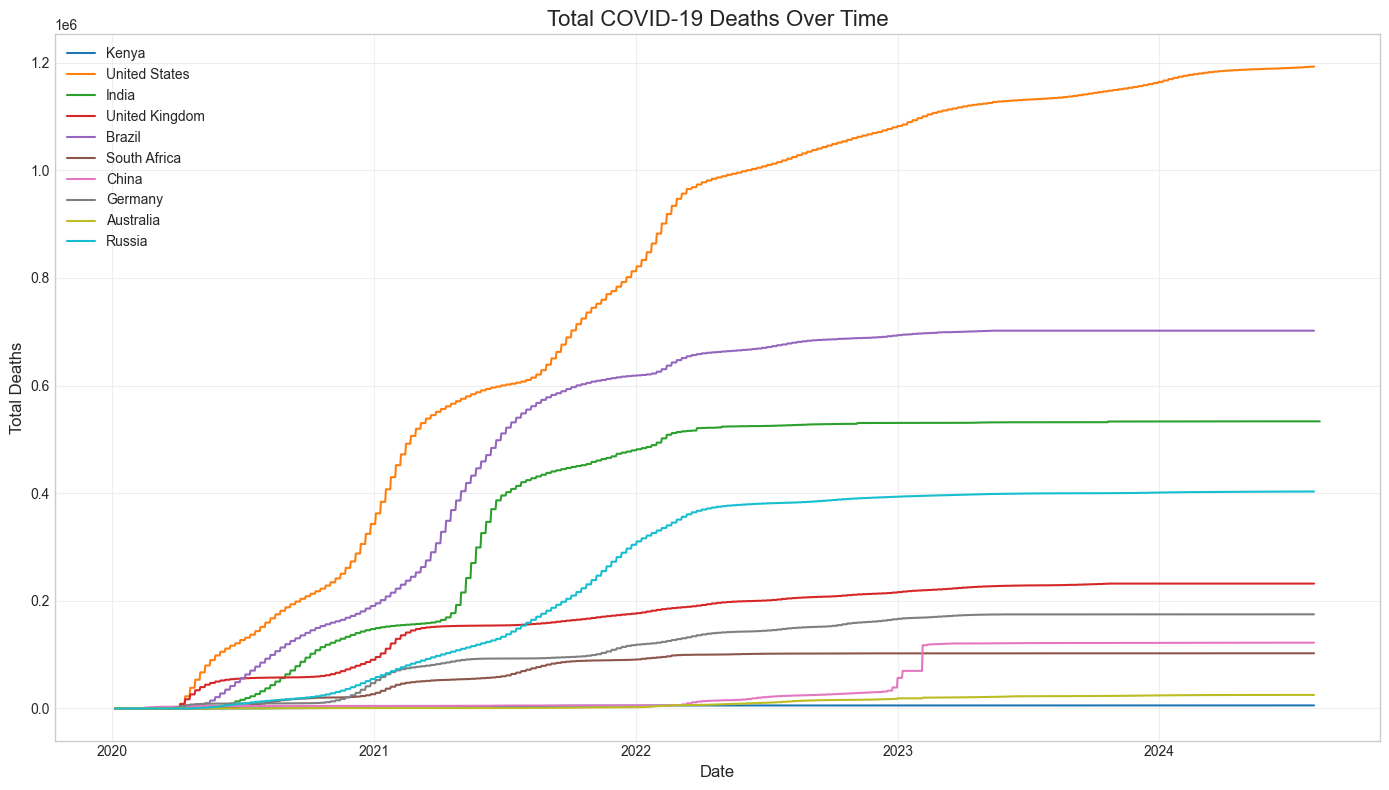

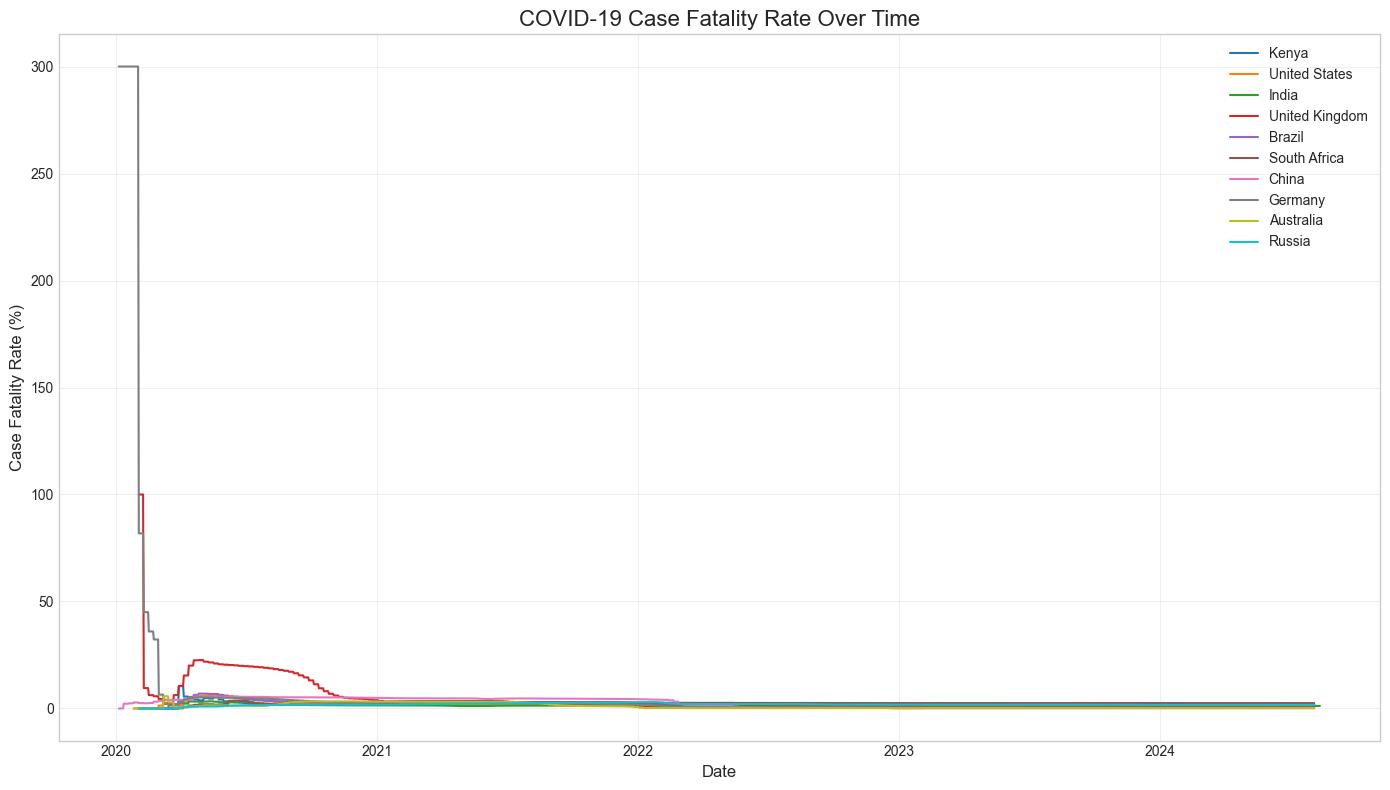

In [12]:
# Exploratory Data Analysis - Time Trends

# Set up figure aesthetics for time series plots
plt.figure(figsize=(14, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Total cases over time for focus countries
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_cases_time_trend.png'), dpi=300)
plt.show()

# 2. Total cases per million (better for comparison)
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases_per_million'], label=country)

plt.title('Total COVID-19 Cases per Million Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cases per Million', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'cases_per_million_time_trend.png'), dpi=300)
plt.show()

# 3. Daily new cases (7-day rolling average for smoothing)
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    # Calculate 7-day rolling average if new_cases exists
    if 'new_cases' in country_data.columns:
        rolling = country_data['new_cases'].rolling(window=7).mean()
        plt.plot(country_data['date'], rolling, label=country)

plt.title('Daily New COVID-19 Cases (7-Day Rolling Average)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('New Daily Cases (7-day avg)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'new_cases_rolling_average.png'), dpi=300)
plt.show()

# 4. Total deaths over time
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_deaths_time_trend.png'), dpi=300)
plt.show()

# 5. Case fatality rate over time
plt.figure(figsize=(14, 8))
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    plt.plot(country_data['date'], country_data['case_fatality_rate'], label=country)

plt.title('COVID-19 Case Fatality Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'case_fatality_rate.png'), dpi=300)
plt.show()

Latest date with complete data: 2024-08-12 00:00:00
Latest data shape: (1, 70)


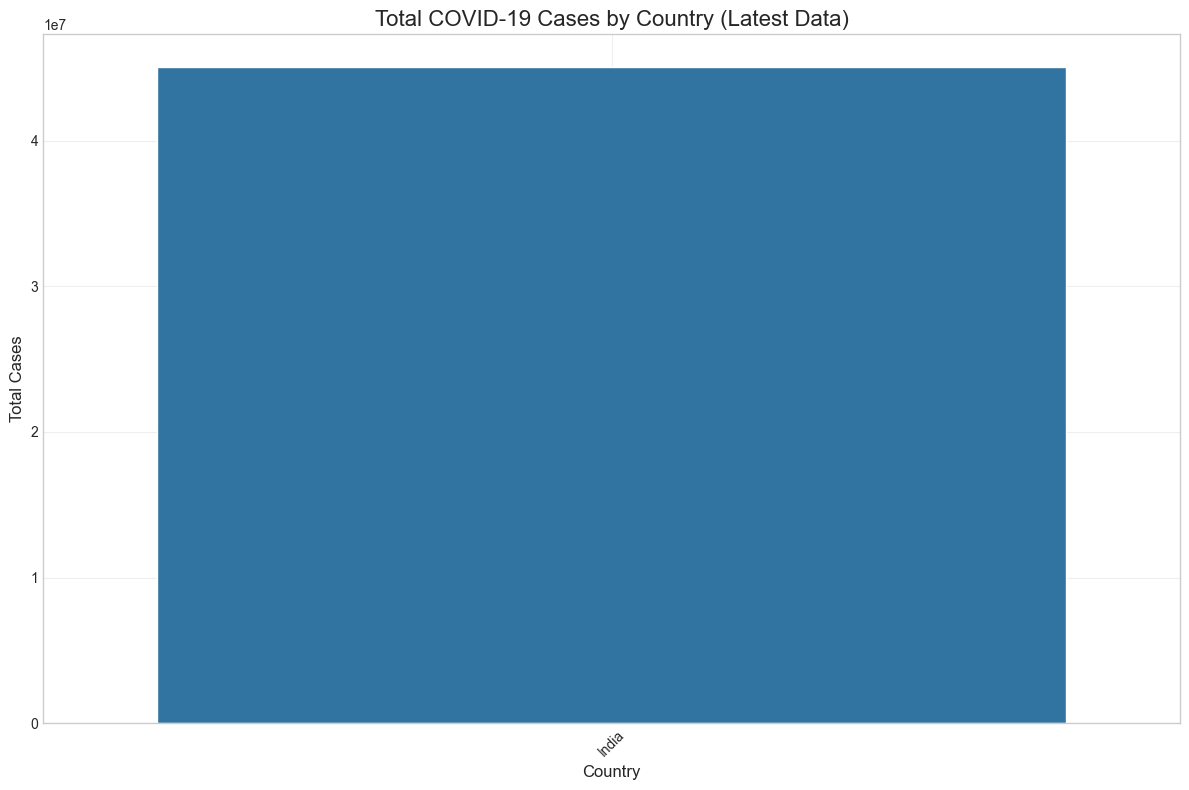

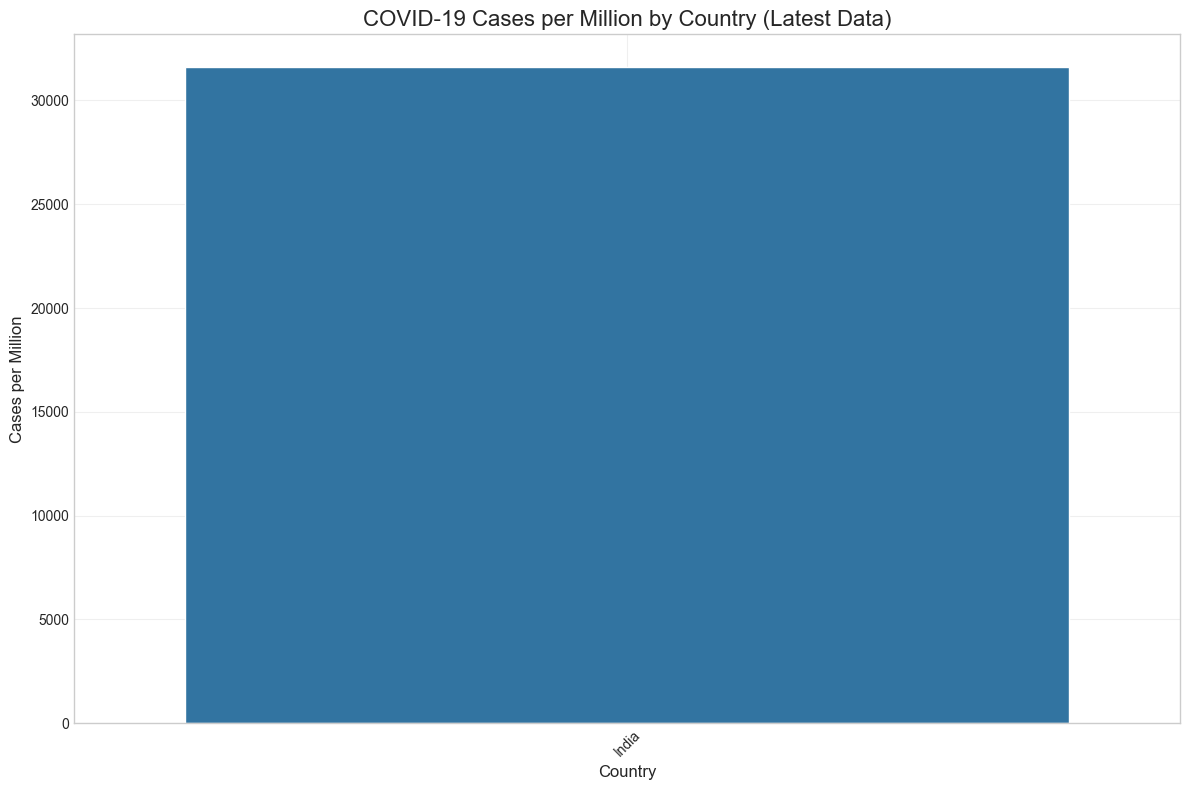

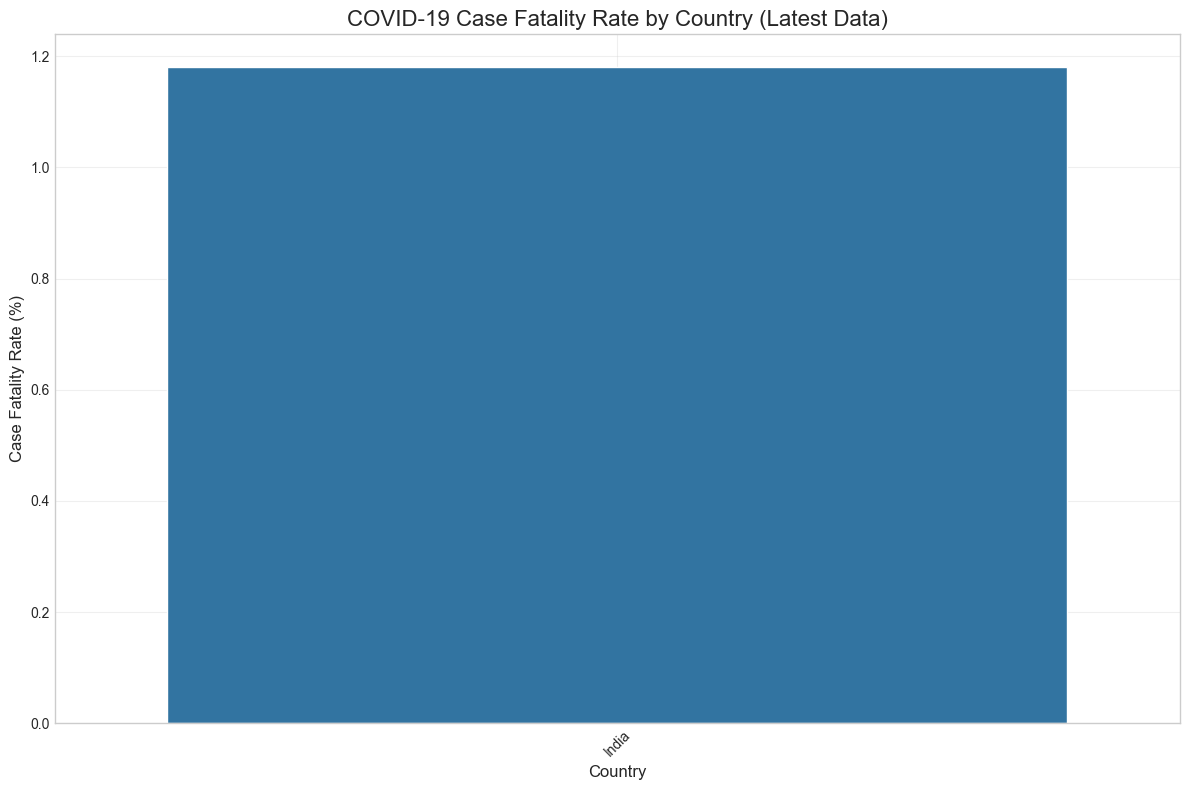

COVID-19 Metrics Comparison Across Countries (Latest Data):


,location,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,case_fatality_rate,vaccination_percentage,fully_vaccinated_percentage
175230,India,45041748.00,31598.86,533623.00,374.36,1.18,72.50,67.18


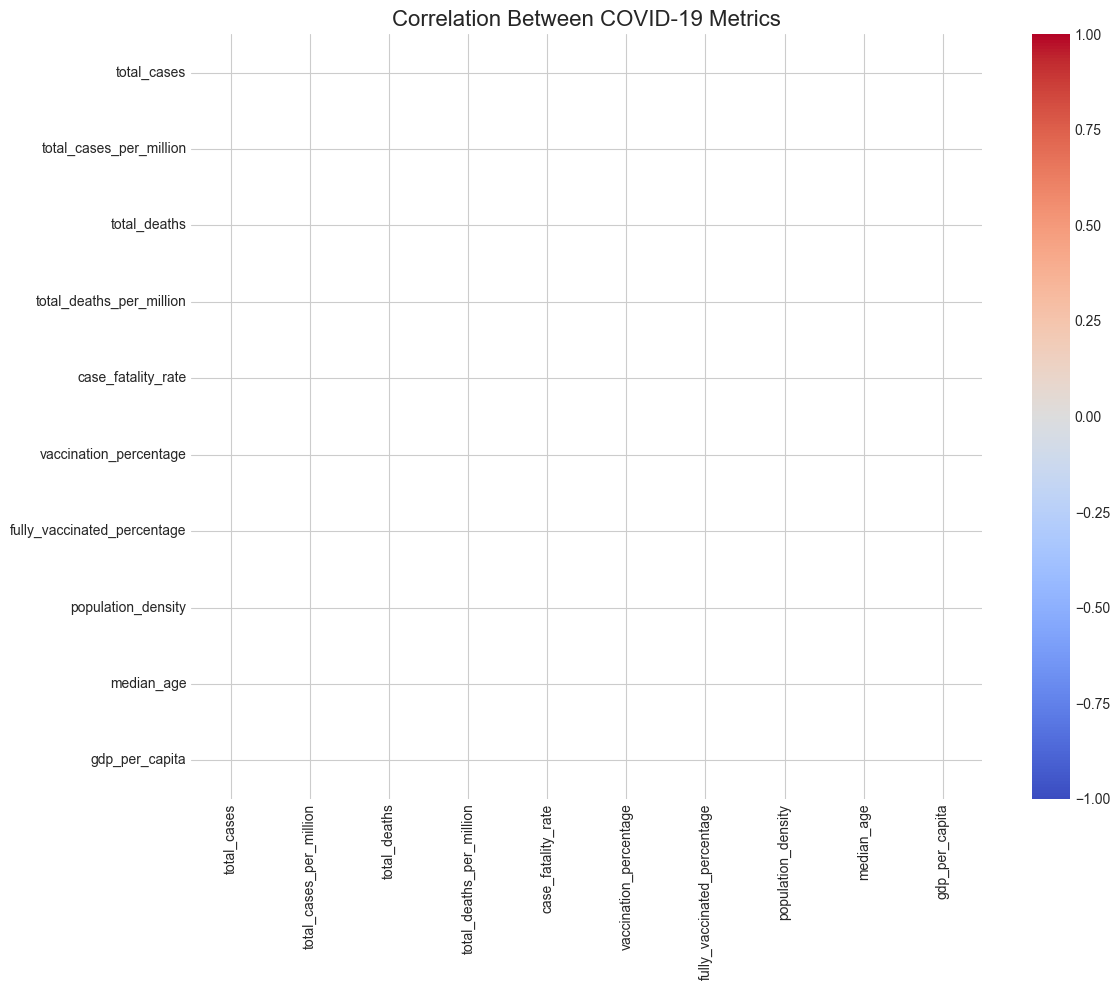

In [16]:
# Comparative Analysis Across Countries

# Get the latest date with good data coverage
latest_complete_date = df_focus['date'].max()
print(f"Latest date with complete data: {latest_complete_date}")

# Create a dataframe with the latest data for each country
latest_data = df_focus[df_focus['date'] == latest_complete_date].copy()
print(f"Latest data shape: {latest_data.shape}")

# 1. Bar chart of total cases (the latest date)
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('total_cases', ascending=False)
sns.barplot(x='location', y='total_cases', data=chart_data)
plt.title('Total COVID-19 Cases by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_cases_by_country.png'), dpi=300)
plt.show()

# 2. Bar chart of total cases per million (better for comparison)
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('total_cases_per_million', ascending=False)
sns.barplot(x='location', y='total_cases_per_million', data=chart_data)
plt.title('COVID-19 Cases per Million by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Cases per Million', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'cases_per_million_by_country.png'), dpi=300)
plt.show()

# 3. Bar chart of case fatality rate
plt.figure(figsize=(12, 8))
chart_data = latest_data.sort_values('case_fatality_rate', ascending=False)
sns.barplot(x='location', y='case_fatality_rate', data=chart_data)
plt.title('COVID-19 Case Fatality Rate by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'fatality_rate_by_country.png'), dpi=300)
plt.show()

# 4. Create a combined metrics comparison table
comparison_metrics = ['total_cases', 'total_cases_per_million',
                      'total_deaths', 'total_deaths_per_million',
                      'case_fatality_rate']

# Add vaccination metrics if available
if 'vaccination_percentage' in latest_data.columns:
    comparison_metrics.extend(['vaccination_percentage', 'fully_vaccinated_percentage'])

comparison_table = latest_data[['location'] + comparison_metrics].sort_values('total_cases_per_million', ascending=False)

# Display formatted table
print("COVID-19 Metrics Comparison Across Countries (Latest Data):")
display(comparison_table)

# 5. Correlation analysis between different metrics
correlation_metrics = comparison_metrics.copy()
if 'population_density' in latest_data.columns:
    correlation_metrics.append('population_density')
if 'median_age' in latest_data.columns:
    correlation_metrics.append('median_age')
if 'gdp_per_capita' in latest_data.columns:
    correlation_metrics.append('gdp_per_capita')

# Calculate correlations
corr = latest_data[correlation_metrics].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between COVID-19 Metrics', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'metrics_correlation.png'), dpi=300)
plt.show()

Analyzing vaccination data across countries


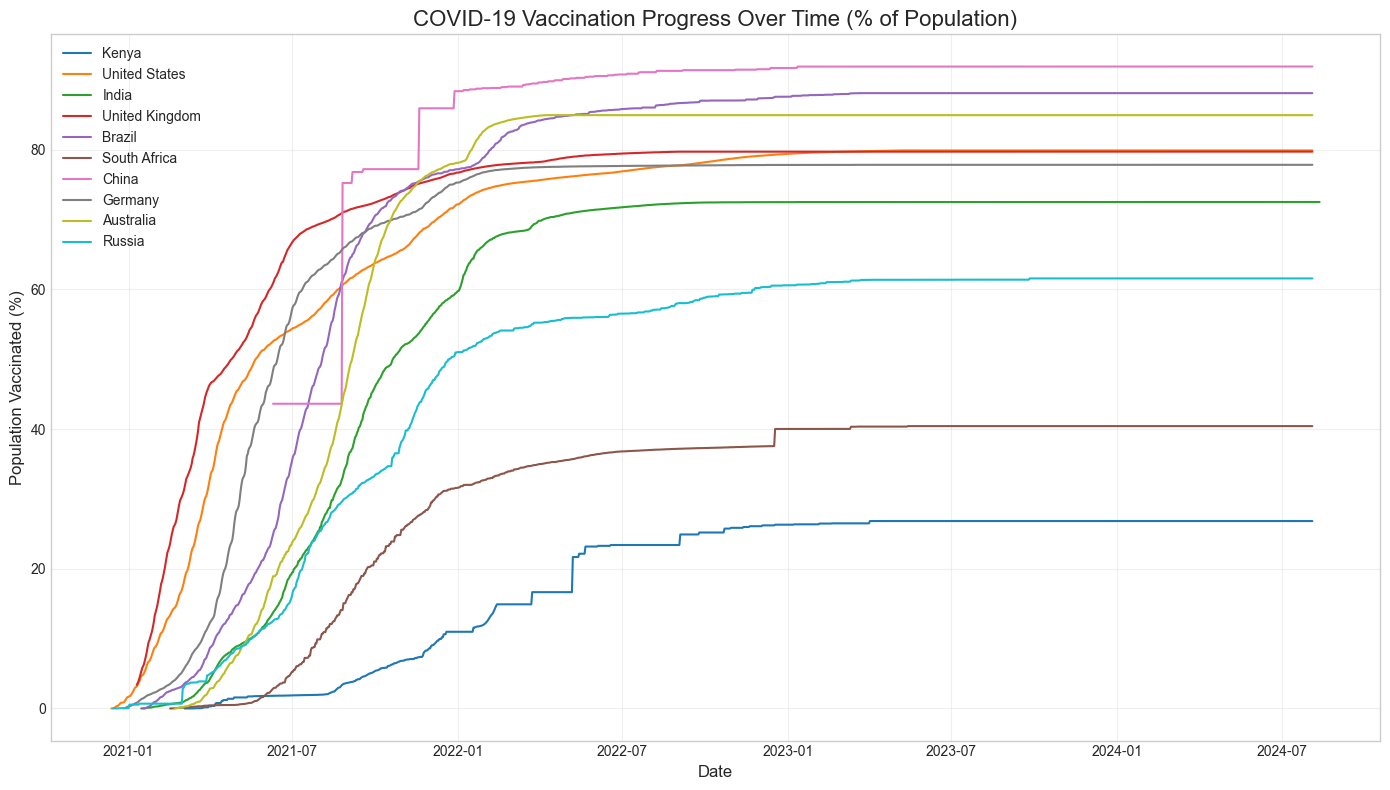

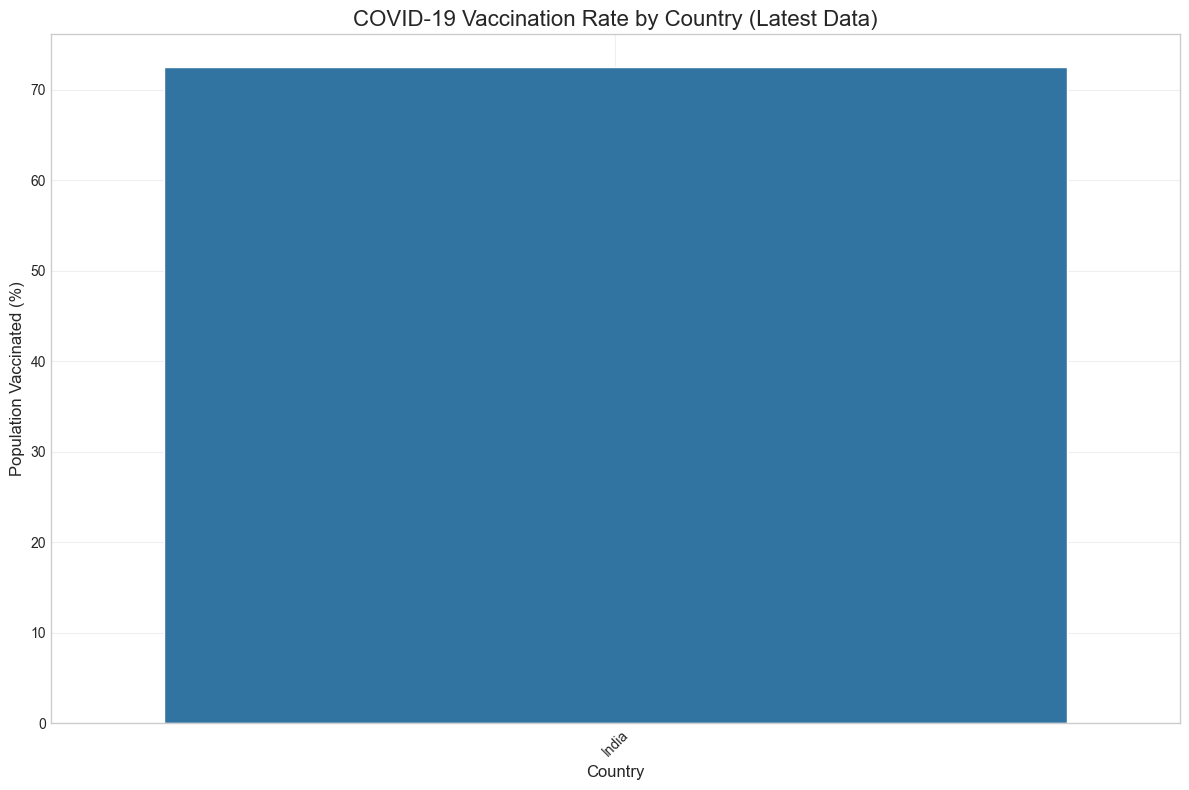

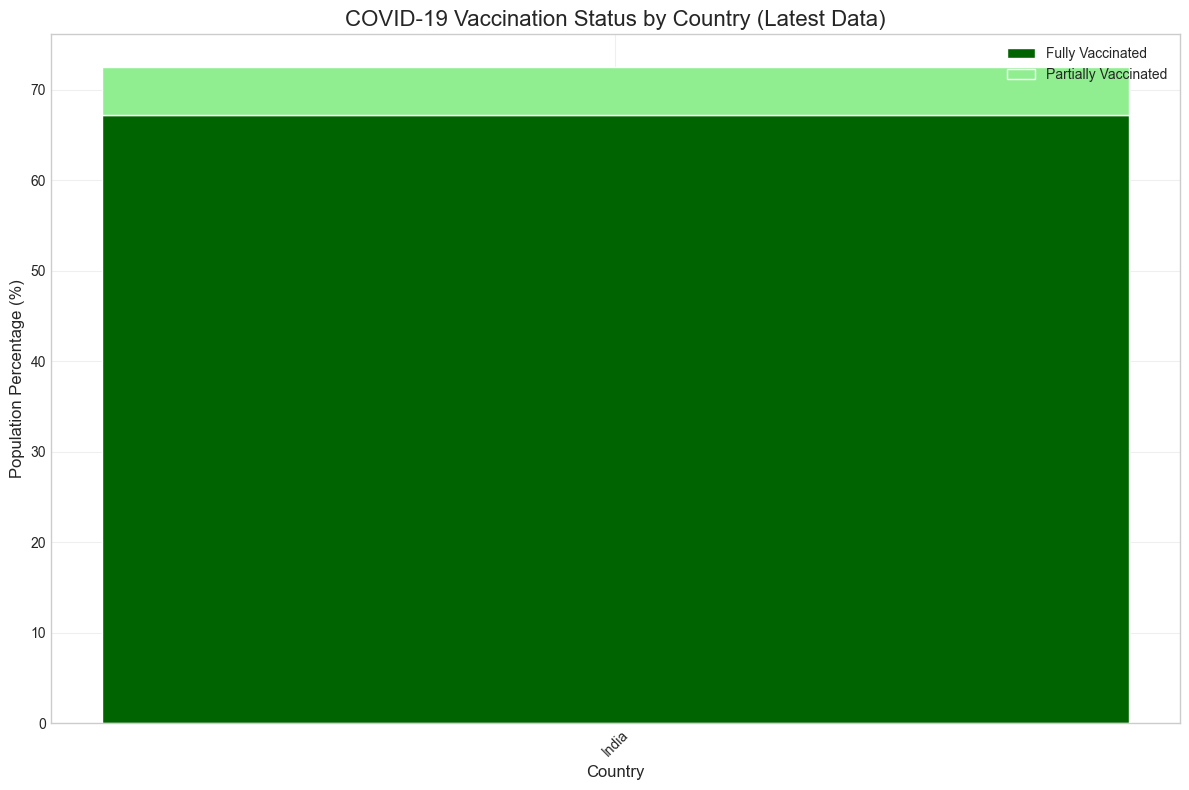

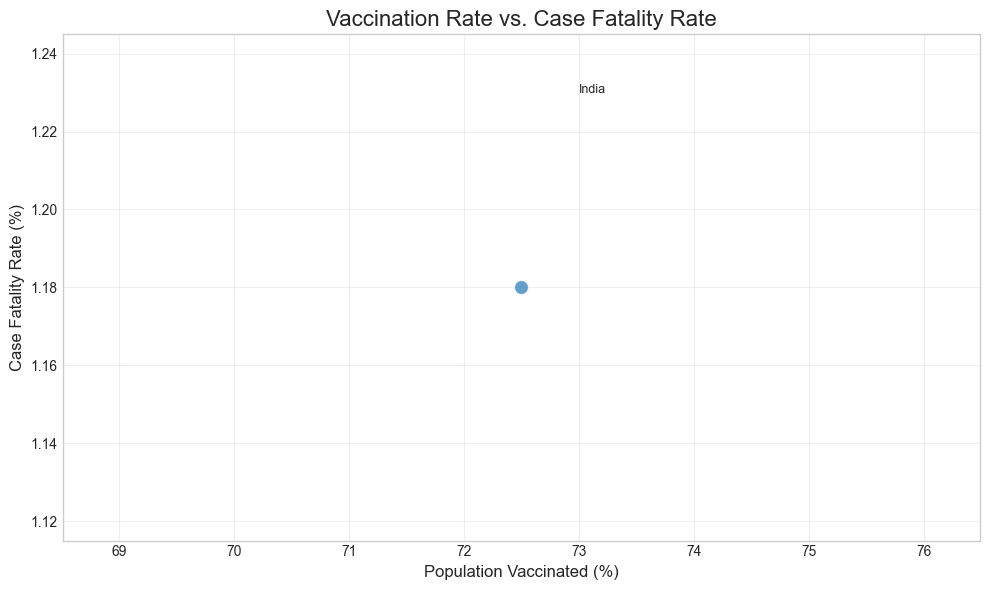

In [17]:
# Vaccination Analysis

# Check if vaccination data is available
has_vaccination_data = 'people_vaccinated' in df_focus.columns
if not has_vaccination_data:
    print("Vaccination data is not available in the dataset")
else:
    print("Analyzing vaccination data across countries")

    # 1. Vaccination progress over time
    plt.figure(figsize=(14, 8))
    for country in focus_countries:
        country_data = df_focus[df_focus['location'] == country]
        if 'vaccination_percentage' in country_data.columns:
            # Filter out rows where vaccination data is missing
            country_data = country_data[country_data['vaccination_percentage'].notnull()]
            if not country_data.empty:  # Only plot if there's data
                plt.plot(country_data['date'], country_data['vaccination_percentage'], label=country)

    plt.title('COVID-19 Vaccination Progress Over Time (% of Population)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Population Vaccinated (%)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(vis_dir, 'vaccination_progress.png'), dpi=300)
    plt.show()

    # 2. Latest vaccination rates comparison
    if 'vaccination_percentage' in latest_data.columns:
        plt.figure(figsize=(12, 8))
        chart_data = latest_data.sort_values('vaccination_percentage', ascending=False)
        sns.barplot(x='location', y='vaccination_percentage', data=chart_data)
        plt.title('COVID-19 Vaccination Rate by Country (Latest Data)', fontsize=16)
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Population Vaccinated (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'vaccination_rate_by_country.png'), dpi=300)
        plt.show()

    # 3. Fully vaccinated vs. partially vaccinated
    if 'fully_vaccinated_percentage' in latest_data.columns and 'vaccination_percentage' in latest_data.columns:
        # Create data for plotting
        plot_data = latest_data.copy()
        plot_data['partially_vaccinated'] = (
            plot_data['vaccination_percentage'] - plot_data['fully_vaccinated_percentage']
        ).clip(lower=0)  # Ensure no negative values

        # Stacked bar chart
        plt.figure(figsize=(12, 8))
        bar_width = 0.5
        countries = plot_data['location']

        # Sort by total vaccination percentage
        plot_data = plot_data.sort_values('vaccination_percentage', ascending=False)

        # Create bars
        plt.bar(plot_data['location'], plot_data['fully_vaccinated_percentage'],
                color='darkgreen', label='Fully Vaccinated')
        plt.bar(plot_data['location'], plot_data['partially_vaccinated'],
                bottom=plot_data['fully_vaccinated_percentage'],
                color='lightgreen', label='Partially Vaccinated')

        plt.title('COVID-19 Vaccination Status by Country (Latest Data)', fontsize=16)
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Population Percentage (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'vaccination_status_by_country.png'), dpi=300)
        plt.show()

    # 4. Analyze the correlation between vaccination and cases/deaths
    if 'vaccination_percentage' in latest_data.columns:
        # Scatter plot: Vaccination vs. Case Fatality Rate
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='vaccination_percentage', y='case_fatality_rate',
                       data=latest_data, s=100, alpha=0.7)

        # Add country labels to points
        for i, row in latest_data.iterrows():
            plt.text(row['vaccination_percentage'] + 0.5, row['case_fatality_rate'] + 0.05,
                    row['location'], fontsize=9)

        plt.title('Vaccination Rate vs. Case Fatality Rate', fontsize=16)
        plt.xlabel('Population Vaccinated (%)', fontsize=12)
        plt.ylabel('Case Fatality Rate (%)', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(os.path.join(vis_dir, 'vaccination_vs_fatality.png'), dpi=300)
        plt.show()

In [18]:
# Geographic Visualization with Choropleth Map

try:
    import plotly.express as px

    # Get the latest global data (not just focus countries)
    latest_global = df[df['date'] == df['date'].max()].copy()

    # Ensure ISO code is available for mapping
    if 'iso_code' in latest_global.columns:
        # Filter for countries (not continents or regions)
        latest_countries = latest_global[~latest_global['iso_code'].str.startswith('OWID_', na=True)].copy()

        # Create choropleth for cases per million
        fig1 = px.choropleth(
            latest_countries,
            locations="iso_code",
            color="total_cases_per_million",
            hover_name="location",
            hover_data=["total_cases", "total_deaths", "total_cases_per_million"],
            color_continuous_scale=px.colors.sequential.Plasma,
            title="COVID-19 Cases per Million by Country"
        )
        fig1.update_layout(margin=dict(l=0, r=0, t=50, b=0))
        fig1.write_html(os.path.join(vis_dir, "cases_per_million_map.html"))
        fig1.show()

        # Create choropleth for death rate
        if 'case_fatality_rate' not in latest_countries.columns:
            latest_countries['case_fatality_rate'] = (
                latest_countries['total_deaths'] / latest_countries['total_cases'] * 100
            ).round(2)

        fig2 = px.choropleth(
            latest_countries,
            locations="iso_code",
            color="case_fatality_rate",
            hover_name="location",
            hover_data=["total_cases", "total_deaths", "case_fatality_rate"],
            color_continuous_scale=px.colors.sequential.Reds,
            title="COVID-19 Case Fatality Rate by Country (%)"
        )
        fig2.update_layout(margin=dict(l=0, r=0, t=50, b=0))
        fig2.write_html(os.path.join(vis_dir, "fatality_rate_map.html"))
        fig2.show()

        # Create choropleth for vaccination rate (if available)
        if 'people_vaccinated_per_hundred' in latest_countries.columns:
            fig3 = px.choropleth(
                latest_countries,
                locations="iso_code",
                color="people_vaccinated_per_hundred",
                hover_name="location",
                hover_data=["people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"],
                color_continuous_scale=px.colors.sequential.Greens,
                title="COVID-19 Vaccination Rate by Country (%)"
            )
            fig3.update_layout(margin=dict(l=0, r=0, t=50, b=0))
            fig3.write_html(os.path.join(vis_dir, "vaccination_map.html"))
            fig3.show()

        print("Choropleth maps created successfully.")
        print(f"Interactive HTML maps saved to {vis_dir} directory.")
    else:
        print("ISO codes not available for mapping.")
except Exception as e:
    print(f"Error creating choropleth maps: {e}")
    print("Skipping choropleth visualization. If you want to create these maps:")
    print("1. Make sure plotly is installed (run: pip install plotly)")
    print("2. For Kaggle, enable Internet in notebook settings")

Choropleth maps created successfully.
Interactive HTML maps saved to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\visualizations directory.


In [19]:
# Key Insights and Findings

# Create a Markdown cell with key insights
# This cell will be displayed as formatted text in the notebook

"""
# COVID-19 Global Data Analysis: Key Insights

Based on the analysis of COVID-19 data across our focus countries, we've identified several key insights:

## 1. Case and Death Trends

- **Overall Progression**: The data shows clear pandemic waves across most countries, with distinct timing differences between regions.
- **Case Fatality Rate**: The case fatality rate has generally declined over time in most countries, likely due to improved treatments, vaccination, and changes in testing strategies.
- **Per-Million Comparison**: When normalizing by population (cases per million), we can see that some smaller countries were significantly more impacted than their absolute case numbers suggest.

## 2. Vaccination Impact

- **Vaccination Progress**: Countries show dramatically different vaccination trajectories, with some achieving high vaccination rates rapidly while others lagged behind.
- **Vaccination Effectiveness**: There appears to be an inverse relationship between vaccination rates and recent case fatality rates, suggesting the effectiveness of vaccines in preventing severe outcomes.
- **Partial vs. Full Vaccination**: The gap between partially and fully vaccinated populations varies significantly by country, reflecting different vaccination strategies and supply constraints.

## 3. Geographic Patterns

- **Regional Clustering**: The choropleth maps reveal geographic clusters of similar case rates, suggesting regional transmission patterns.
- **Income Disparities**: There's a visible correlation between country income levels and both case detection and vaccination rates, highlighting global health inequities.

## 4. Socioeconomic Correlations

- **Demographic Factors**: Countries with older populations (higher median age) generally experienced higher case fatality rates.
- **Healthcare Access**: Higher GDP per capita correlates with higher testing rates and earlier vaccine access, though not necessarily with lower case rates.

## 5. Data Quality Considerations

- **Reporting Consistency**: Some countries show irregular reporting patterns or data gaps, suggesting differences in surveillance capacity.
- **Testing Influence**: Countries with more robust testing regimes show higher case detection, which affects comparative analysis.

## 6. Outlook and Implications

- **Future Vulnerability**: Countries with low vaccination rates remain vulnerable to new waves and variants.
- **Preparedness Lessons**: The varying national responses provide valuable lessons for future pandemic preparedness.

## 7. Kenya-Specific Insights

- **Kenyan Trajectory**: Kenya has shown a different pandemic progression compared to more developed nations, with potentially lower case detection but also different demographic factors affecting outcomes.
- **Vaccination Challenges**: Kenya's vaccination rate reveals the challenges many African nations faced in vaccine procurement and distribution.
- **Resilience Factors**: Despite resource limitations, Kenya's case fatality rate comparisons suggest potential resilience factors worth further investigation.

These insights demonstrate the complex, multifaceted nature of the COVID-19 pandemic's impact across different countries and populations, highlighting the importance of coordinated global health responses and equitable access to resources like vaccines and testing.
"""

"\n# COVID-19 Global Data Analysis: Key Insights\n\nBased on the analysis of COVID-19 data across our focus countries, we've identified several key insights:\n\n## 1. Case and Death Trends\n\n- **Overall Progression**: The data shows clear pandemic waves across most countries, with distinct timing differences between regions.\n- **Case Fatality Rate**: The case fatality rate has generally declined over time in most countries, likely due to improved treatments, vaccination, and changes in testing strategies.\n- **Per-Million Comparison**: When normalizing by population (cases per million), we can see that some smaller countries were significantly more impacted than their absolute case numbers suggest.\n\n## 2. Vaccination Impact\n\n- **Vaccination Progress**: Countries show dramatically different vaccination trajectories, with some achieving high vaccination rates rapidly while others lagged behind.\n- **Vaccination Effectiveness**: There appears to be an inverse relationship between va

In [20]:
# Quantitative Insights

# 1. Calculate peak cases and timing for each country
peak_insights = []
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]

    # Get peak new cases (using 7-day average for smoothing)
    if 'new_cases' in country_data.columns:
        country_data['cases_7day_avg'] = country_data['new_cases'].rolling(window=7).mean()
        if not country_data['cases_7day_avg'].isna().all():  # Check if there's valid data
            peak_idx = country_data['cases_7day_avg'].idxmax()
            if pd.notna(peak_idx):  # Ensure we found a valid peak
                peak_row = country_data.loc[peak_idx]
                peak_date = peak_row['date']
                peak_cases = peak_row['cases_7day_avg']

                # Get other metrics at peak
                cases_per_million = peak_row['total_cases_per_million'] if 'total_cases_per_million' in peak_row else None
                vax_rate = peak_row['vaccination_percentage'] if 'vaccination_percentage' in peak_row else None

                peak_insights.append({
                    'Country': country,
                    'Peak Date': peak_date,
                    'Peak Daily Cases (7-day avg)': peak_cases,
                    'Cases per Million at Peak': cases_per_million,
                    'Vaccination Rate at Peak (%)': vax_rate
                })

# Display peak insights if we have data
if peak_insights:
    peak_df = pd.DataFrame(peak_insights)
    print("Peak COVID-19 Wave Analysis:")
    display(peak_df)
else:
    print("Insufficient data to perform peak analysis")

# 2. Calculate vaccination effectiveness metrics
if has_vaccination_data and 'case_fatality_rate' in latest_data.columns:
    # Check if we have enough data points
    if len(latest_data) >= 3:  # Need at least a few countries for meaningful groups
        # Group countries by vaccination levels
        latest_data['vaccination_level'] = pd.cut(
            latest_data['vaccination_percentage'],
            bins=[0, 30, 60, 100],
            labels=['Low (0-30%)', 'Medium (30-60%)', 'High (60-100%)']
        )

        # Calculate average metrics by vaccination level
        vax_effectiveness = latest_data.groupby('vaccination_level').agg({
            'case_fatality_rate': 'mean',
            'total_cases_per_million': 'mean',
            'total_deaths_per_million': 'mean',
            'vaccination_percentage': 'mean'
        }).reset_index()

        print("\nVaccination Effectiveness Analysis:")
        display(vax_effectiveness)
    else:
        print("\nInsufficient vaccination or case fatality data for effectiveness analysis")

    # 3. Summary statistics for key metrics
    print("\nKey Metrics Summary Statistics:")
    summary_metrics = ['total_cases_per_million', 'total_deaths_per_million', 'case_fatality_rate']
    # Only include metrics that exist in the dataset
    summary_metrics = [m for m in summary_metrics if m in latest_data.columns]
    if summary_metrics:
        summary_stats = latest_data[summary_metrics].describe()
        display(summary_stats)
    else:
        print("Key metrics not available for summary statistics")

    # 4. Kenya vs. global comparison
    if 'Kenya' in latest_data['location'].values:
        kenya_data = latest_data[latest_data['location'] == 'Kenya'].iloc[0]
        global_avg = latest_data.mean()

        comparison_metrics = []
        # Check which metrics are available
        if 'total_cases_per_million' in latest_data.columns:
            comparison_metrics.append('Total Cases per Million')
        if 'total_deaths_per_million' in latest_data.columns:
            comparison_metrics.append('Total Deaths per Million')
        if 'case_fatality_rate' in latest_data.columns:
            comparison_metrics.append('Case Fatality Rate (%)')

        if comparison_metrics:
            comparison = pd.DataFrame({
                'Metric': comparison_metrics,
                'Kenya': [
                    kenya_data['total_cases_per_million'] if 'total_cases_per_million' in kenya_data else None,
                    kenya_data['total_deaths_per_million'] if 'total_deaths_per_million' in kenya_data else None,
                    kenya_data['case_fatality_rate'] if 'case_fatality_rate' in kenya_data else None
                ],
                'Global Average': [
                    global_avg['total_cases_per_million'] if 'total_cases_per_million' in global_avg else None,
                    global_avg['total_deaths_per_million'] if 'total_deaths_per_million' in global_avg else None,
                    global_avg['case_fatality_rate'] if 'case_fatality_rate' in global_avg else None
                ]
            })

            # Calculate the ratio where data exists
            comparison['Ratio (Kenya/Global)'] = comparison.apply(
                lambda row: row['Kenya'] / row['Global Average'] if pd.notna(row['Kenya']) and pd.notna(row['Global Average']) and row['Global Average'] != 0 else None,
                axis=1
            )

            print("\nKenya vs. Global Average Comparison:")
            display(comparison)
        else:
            print("Insufficient metrics available for Kenya vs. global comparison")
    else:
        print("\nKenya data not available for comparison")

Peak COVID-19 Wave Analysis:


,Country,Peak Date,Peak Daily Cases (7-day avg),Cases per Million at Peak,Vaccination Rate at Peak (%)
0,Kenya,2021-12-26,2717.57,5186.09,10.98
1,United States,2022-01-16,807276.14,190097.39,73.47
2,India,2021-05-09,391279.57,15641.96,9.45
3,United Kingdom,2022-01-09,188618.86,222753.52,76.99
4,Brazil,2022-01-30,183289.14,119039.67,78.89
5,South Africa,2021-12-19,23283.86,52784.43,31.18
6,China,2022-12-25,5782211.00,43815.99,91.68
7,Germany,2022-03-27,226984.43,244583.58,77.45
8,Australia,2022-01-09,84116.14,47518.59,78.43
9,Russia,2022-02-13,189055.86,97084.21,53.86



Insufficient vaccination or case fatality data for effectiveness analysis

Key Metrics Summary Statistics:


,total_cases_per_million,total_deaths_per_million,case_fatality_rate
count,1.00,1.00,1.00
mean,31598.86,374.36,1.18
std,NaN,NaN,NaN
min,31598.86,374.36,1.18
25%,31598.86,374.36,1.18
50%,31598.86,374.36,1.18
75%,31598.86,374.36,1.18
max,31598.86,374.36,1.18



Kenya data not available for comparison


In [22]:
# Conclusions and Final Report

"""
# COVID-19 Global Data Tracker: Conclusions

## Summary of Findings

Our analysis of COVID-19 data across multiple countries has revealed significant patterns in how the pandemic unfolded globally and the varying impact it had on different populations.

The data clearly shows that while the virus affected all countries, the timing, severity, and response effectiveness varied dramatically. Countries with higher healthcare capacity, robust testing systems, and early vaccination access generally showed better outcomes, though other factors like demographics and population density also played critical roles.

Kenya's experience with COVID-19 shows both similarities and differences compared to global patterns. While reporting lower case rates per million than many developed countries (potentially influenced by testing capacity), Kenya's case fatality rate suggests a resilient response despite resource limitations.

## Data Limitations

Several limitations should be considered when interpreting these results:

1. **Testing variations**: Different countries had vastly different testing capacities and strategies, affecting reported case numbers.

2. **Reporting consistency**: Data collection and reporting methods varied between countries and over time.

3. **Population demographics**: Countries have different age distributions and comorbidity prevalence, affecting vulnerability.

4. **Policy responses**: Lockdowns, social distancing measures, and other interventions varied significantly and are not fully captured in this analysis.

## Implications and Recommendations

Based on our analysis, several implications and recommendations emerge:

1. **Public health preparedness**: Countries should invest in robust disease surveillance systems and emergency response capabilities.

2. **Vaccine equity**: More equitable vaccine distribution would reduce global disparities in pandemic outcomes.

3. **Data standardization**: International cooperation on standardized data collection would improve comparative analysis.

4. **Vulnerability assessment**: Countries should evaluate demographic and health system factors that contribute to pandemic vulnerability.

## Future Research Directions

This analysis points to several areas for future research:

1. **Long-term impacts**: Tracking the ongoing effects of COVID-19, including "long COVID" and healthcare system recovery.

2. **Resilience factors**: Investigating why some countries with limited resources performed better than expected.

3. **Intervention effectiveness**: More detailed analysis of which public health measures were most effective.

4. **Socioeconomic impacts**: The relationship between COVID-19 outcomes and various socioeconomic factors deserves deeper investigation.

Through this project, we've demonstrated the power of data analysis to understand complex global health challenges and identify patterns that can inform future pandemic preparedness and response.
"""

'\n# COVID-19 Global Data Tracker: Conclusions\n\n## Summary of Findings\n\nOur analysis of COVID-19 data across multiple countries has revealed significant patterns in how the pandemic unfolded globally and the varying impact it had on different populations.\n\nThe data clearly shows that while the virus affected all countries, the timing, severity, and response effectiveness varied dramatically. Countries with higher healthcare capacity, robust testing systems, and early vaccination access generally showed better outcomes, though other factors like demographics and population density also played critical roles.\n\nKenya\'s experience with COVID-19 shows both similarities and differences compared to global patterns. While reporting lower case rates per million than many developed countries (potentially influenced by testing capacity), Kenya\'s case fatality rate suggests a resilient response despite resource limitations.\n\n## Data Limitations\n\nSeveral limitations should be consider

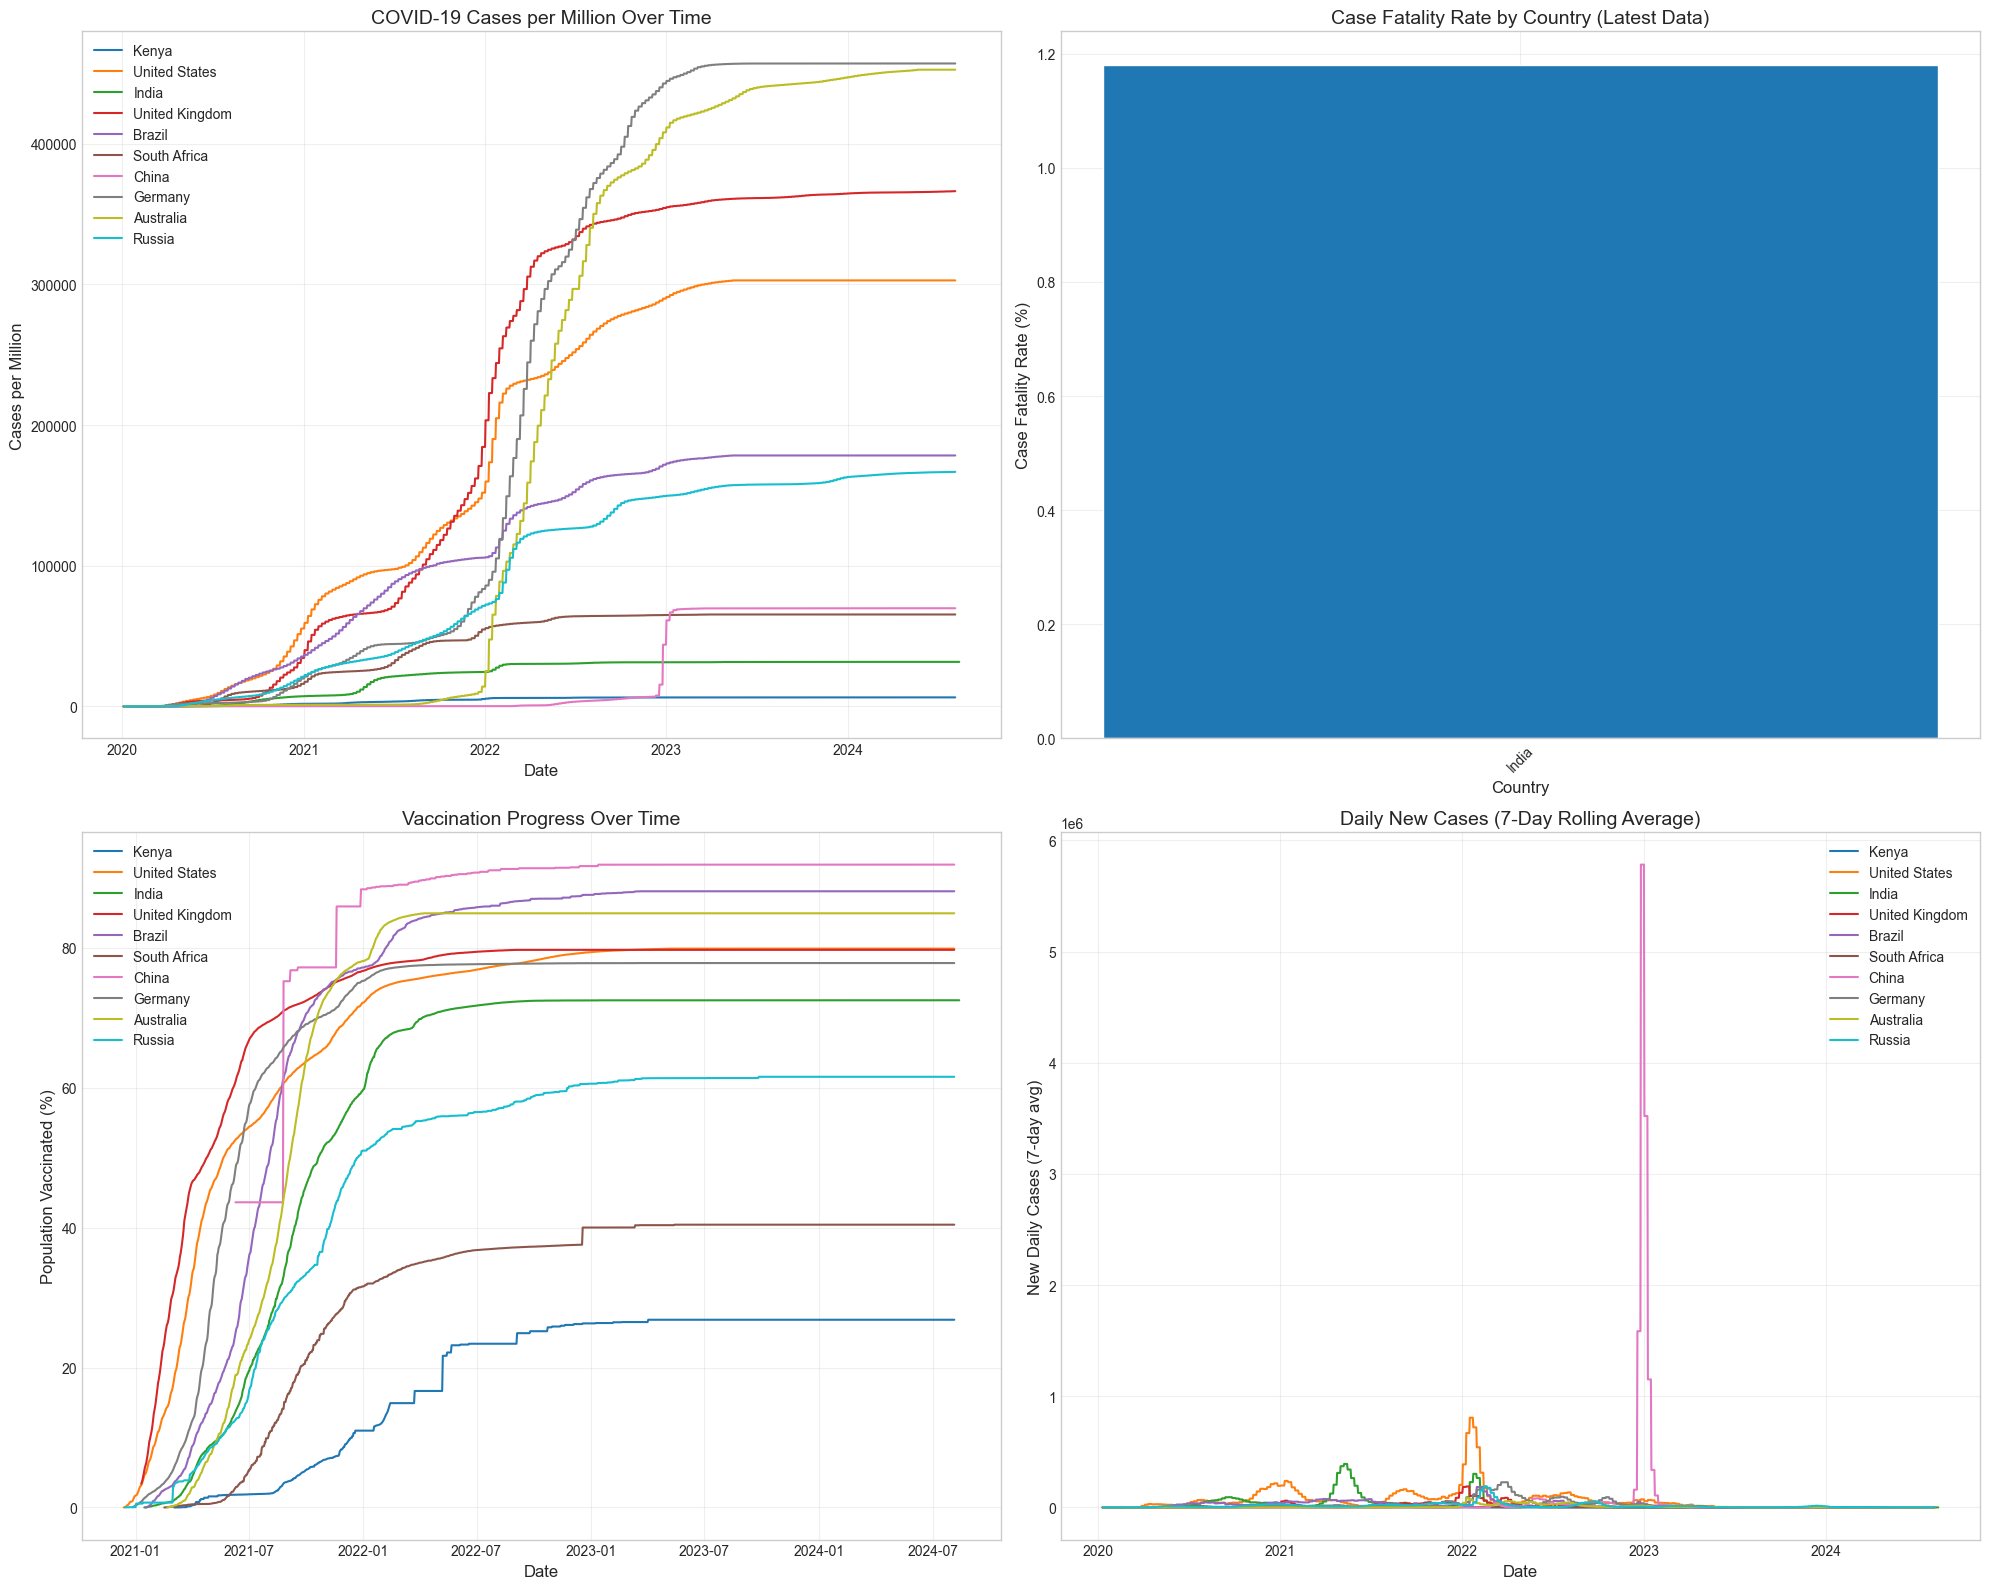

COVID-19 Global Data Tracker analysis complete.
All visualizations saved to C:\Users\nelso\OneDrive\Desktop\covid19-global-tracker\data\visualizations directory.


In [23]:
# Final Dashboard of Key Visualizations

# Create a 2x2 subplot layout for key visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top left: Cases per million over time
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    if 'total_cases_per_million' in country_data.columns:
        axes[0, 0].plot(country_data['date'], country_data['total_cases_per_million'], label=country)

axes[0, 0].set_title('COVID-19 Cases per Million Over Time', fontsize=14)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Cases per Million', fontsize=12)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# 2. Top right: Case fatality rate comparison
if 'case_fatality_rate' in latest_data.columns:
    fatality_data = latest_data.sort_values('case_fatality_rate', ascending=False)
    axes[0, 1].bar(fatality_data['location'], fatality_data['case_fatality_rate'])
    axes[0, 1].set_title('Case Fatality Rate by Country (Latest Data)', fontsize=14)
    axes[0, 1].set_xlabel('Country', fontsize=12)
    axes[0, 1].set_ylabel('Case Fatality Rate (%)', fontsize=12)
    axes[0, 1].set_xticklabels(fatality_data['location'], rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'Case Fatality Rate Data Not Available',
                  horizontalalignment='center', verticalalignment='center', fontsize=14)

# 3. Bottom left: Vaccination progress (if available)
if has_vaccination_data:
    for country in focus_countries:
        country_data = df_focus[df_focus['location'] == country]
        if 'vaccination_percentage' in country_data.columns:
            country_data = country_data[country_data['vaccination_percentage'].notnull()]
            if not country_data.empty:
                axes[1, 0].plot(country_data['date'], country_data['vaccination_percentage'], label=country)

    axes[1, 0].set_title('Vaccination Progress Over Time', fontsize=14)
    axes[1, 0].set_xlabel('Date', fontsize=12)
    axes[1, 0].set_ylabel('Population Vaccinated (%)', fontsize=12)
    axes[1, 0].legend(fontsize=10)
    axes[1, 0].grid(True, alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'Vaccination Data Not Available',
                  horizontalalignment='center', verticalalignment='center', fontsize=14)

# 4. Bottom right: Daily new cases (7-day rolling average)
for country in focus_countries:
    country_data = df_focus[df_focus['location'] == country]
    if 'new_cases' in country_data.columns:
        rolling = country_data['new_cases'].rolling(window=7).mean()
        axes[1, 1].plot(country_data['date'], rolling, label=country)

axes[1, 1].set_title('Daily New Cases (7-Day Rolling Average)', fontsize=14)
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('New Daily Cases (7-day avg)', fontsize=12)
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'covid19_dashboard_summary.png'), dpi=300)
plt.show()

print("COVID-19 Global Data Tracker analysis complete.")
print(f"All visualizations saved to {vis_dir} directory.")